In [ ]:
#Real one

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class ANN:
    def __init__(self,epochs,lr):
        self.epochs=epochs
        self.lr=lr
        self.weight_collector={}
        self.loss_history=[]
        self.smoothing=1e-15
        self.alpha=1e-5
        self.w1=[]
        self.w2=[]
        self.w3=[]
        self.b=0.08

    def fit(self,X_train,y_train):
        #defining some variables
        itr_numb=X_train.shape[0]

        #Initializing weights using he initialization
        self.w1=(np.random.randn(1,3)*np.sqrt(2/2))[0]
        print(self.w1)
        #Node 2 initial random weights
        self.w2=(np.random.randn(1,3)*np.sqrt(2/2))[0]
        print(self.w2)

        #Node 3 initial random weights    
        self.w3=(np.random.randn(1,2)*np.sqrt(2/1))[0]
        print(self.w3)


        
        # Weight adjustments
        for k in range(0,self.epochs):
            loss_sum=0
            for i in range(0,itr_numb):
                #Node 1
                # multiplying weights with input 
                x_vec = X_train[i]
                node1_out = np.dot(x_vec,self.w1)+self.b
                if node1_out<0:
                  node1_out = self.alpha*(node1_out)
                else:
                  node1_out = max(0,node1_out) # relu

                #Node 2
                x_vec = X_train[i]
                node2_out = np.dot(x_vec,self.w2)+self.b
                if node2_out<0:
                  node2_out = self.alpha*(node2_out)
                else:
                  node2_out = max(0,node2_out) # relu

                #Node 3

                #Output layer

                out_layer = [node1_out,node2_out]

                # multiplying weights with input 
                x_vec = X_train[i]
                out_node = np.dot(out_layer,self.w3)+self.b
                y_out=(1/(1+np.exp(-out_node)))

                #Loss/Cost function and weight updation

                # for node 1
                slope1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][0]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*
                           (self.w3[0]*X_train[i][0]))
                self.w1[0] = self.w1[0]-(self.lr*slope1)

                slope2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][1]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][1]))
                self.w1[1] = self.w1[1]-(self.lr*slope2)

                slope3 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][2]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][2]))
                self.w1[1] = self.w1[1]-(self.lr*slope3)

                # for node 2
                slope4 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][0]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][0]))
                self.w2[0] = self.w2[0]-(self.lr*slope4)

                slope5 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][1]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][1]))
                self.w2[1] = self.w2[1]-(self.lr*slope5)

                slope6 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][2]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][2]))
                self.w2[1] = self.w2[1]-(self.lr*slope6)

                #for output node 

                slope7 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(node1_out)-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(node1_out)))
                self.w3[0] = self.w3[0]-(self.lr*slope7)

                slope8 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(node2_out)-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(node2_out))) 
                self.w3[1] = self.w3[1]-(self.lr*slope8)

                ##Kepping the best weights
                loss_sum+=(y_train.iloc[i]*np.log(y_out+self.smoothing))+(
                    (1-y_train.iloc[i])*np.log(1-y_out+self.smoothing))
            
            final_loss = (-loss_sum/itr_numb)
            self.loss_history.append(final_loss)
            #check
            print("************************* epoch ",k," **************************")
            print("##########################################################")
            print("w1",self.w1)
            print("w2",self.w2)
            print("w3",self.w3)
            print(node1_out)
            print(node2_out)
            print(y_out)
            print("current loss is :- ",final_loss)

    def predict(self,X_test):
      #test data
      itr_numb=X_test.shape[0]
      predictions=[]
      for i in range(0,itr_numb):
        #Node 1
        # multiplying weights with input 
        x_vec = X_test[i]
        node1_out = np.dot(x_vec,self.w1)+self.b

        #Node 2
        x_vec = X_test[i]
        node2_out = np.dot(x_vec,self.w2)+self.b

        #Node 3

        #Output layer

        out_layer = [node1_out,node2_out]

        # multiplying weights with input 
        x_vec = X_test[i]
        out_node = np.dot(out_layer,self.w3)+self.b
        y_out=(1/(1+np.exp(-out_node)))
        predictions.append(y_out)
      return predictions

    def train_loss_plot(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epoch number")
        plt.ylabel("loss")
        plt.show()
    def test_report(self,y_test,predictions):
      conf_matrix = confusion_matrix(y_test,predictions)
      sns.heatmap(data=conf_matrix,annot=True,fmt='d')
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      print(classification_report(y_test,predictions))

# Data Preparation

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/backup lab/Jupyter lab backuu/Simple ANN classification /mixed.csv.txt",sep=",")

In [ ]:
df.head(3)

,EvNo,trumu,chargesg,px,py,pz,E,muchhits,stshits,trdhits,tofhits,chisqmuch,chisqsts,chisqtrd,chisqvertex,tofmass
0,1,1,-1,0.853275,-0.847333,7.35208,7.45053,11,8,3,1,1.97966,3.15940,9.20906,2.96263,0.031319
1,2,0,1,-0.431410,-0.554361,4.25411,4.31301,9,8,3,0,3.89112,1.51397,22.56260,1.23243,-1000.000000
2,2,1,-1,0.217476,0.837259,5.95573,6.01915,11,7,4,1,1.61583,2.68982,1.63692,2.96849,-0.057862


In [ ]:
X=df[["muchhits","trdhits","chisqmuch"]]#trdhits, chi much or chi sq vertex
y=df['trumu']

In [ ]:
df.shape

(215343, 16)

In [ ]:
X=X[0:30000]
y=y[0:30000]
scaling = MinMaxScaler()
X_scaled=scaling.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.50,random_state=32)

In [ ]:
X_train.shape

(15000, 3)

In [ ]:
y_train.value_counts()

0    8704
1    6296
Name: trumu, dtype: int64

# Testing

In [ ]:
ann_object = ANN(500,0.0001)

In [ ]:
ann_object.fit(X_train,y_train)

[ 0.56040176 -1.1321941   0.34271364]
[0.87797123 0.09856406 0.67130611]
[0.43112648 0.14238065]
************************* epoch  0  **************************
##########################################################
w1 [ 0.56777366 -1.0971004   0.34271364]
w2 [0.88063265 0.11115712 0.67130611]
w3 [0.30380962 0.12382805]
0.5884121050346632
0.9022198162822435
0.5915928416766955
current loss is :-  0.7288341331522029
************************* epoch  1  **************************
##########################################################
w1 [ 0.57425706 -1.07293654  0.34271364]
w2 [0.88386036 0.12308036 0.67130611]
w3 [0.17933167 0.11604292]
0.5932703201385832
0.9046402139311519
0.5723477096571516
current loss is :-  0.718218640685149
************************* epoch  2  **************************
##########################################################
w1 [ 0.57798424 -1.06082713  0.34271364]
w2 [0.88757002 0.13494908 0.67130611]
w3 [0.05806282 0.11653015]
0.5960617401570247
0.9074223

In [ ]:
ann_object.loss_history

[0.7288341331522029,
 0.718218640685149,
 0.708042537838135,
 0.6983321272461522,
 0.689053110144905,
 0.6802210170602235,
 0.6720297128416894,
 0.6646143645689895,
 0.658009245337912,
 0.6522096959886664,
 0.6470647322430327,
 0.6425968120641469,
 0.6387599675053933,
 0.6353200945754073,
 0.6322759759219693,
 0.6294849567305733,
 0.6267956105437765,
 0.6243456621611123,
 0.6220942369417336,
 0.6200028237552538,
 0.6180369763549165,
 0.6161660859184315,
 0.614363062869152,
 0.6126040110461904,
 0.6108679401443691,
 0.609136534549742,
 0.607393978791803,
 0.6056268300744038,
 0.603823924327373,
 0.6019763017497493,
 0.6000771392500563,
 0.5981216794554173,
 0.5961071484455474,
 0.594032656766654,
 0.5918990804776849,
 0.5897089209515772,
 0.5874661439021499,
 0.5851759996372184,
 0.582844827838667,
 0.5804798512152499,
 0.5780889631296428,
 0.5756805147374416,
 0.5732631072738116,
 0.5708453948863704,
 0.5684359028673095,
 0.5660428653350211,
 0.5636740854256327,
 0.5613368199605084,
 0

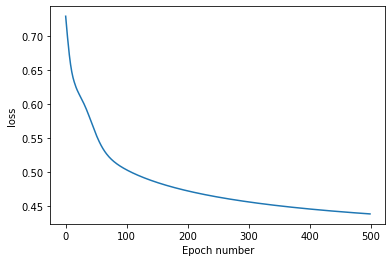

In [ ]:
ann_object.train_loss_plot()

In [ ]:
X_test

array([[0.75      , 1.        , 0.22266107],
       [1.        , 1.        , 0.23243699],
       [0.25      , 0.33333333, 0.23197721],
       ...,
       [0.75      , 0.33333333, 0.2237194 ],
       [0.75      , 0.        , 0.2292561 ],
       [0.25      , 0.        , 0.2238699 ]])

In [ ]:
ann_object.w2

array([1.00271876, 0.99617054, 0.67130611])

In [ ]:
predictions=[]
predictions_sigmoid = ann_object.predict(X_test)
for i in predictions_sigmoid:
  if i>0.5:
    predictions.append(1)
  else:
    predictions.append(0)

              precision    recall  f1-score   support

           0       0.97      0.64      0.77      8597
           1       0.67      0.97      0.79      6403

    accuracy                           0.78     15000
   macro avg       0.82      0.80      0.78     15000
weighted avg       0.84      0.78      0.78     15000



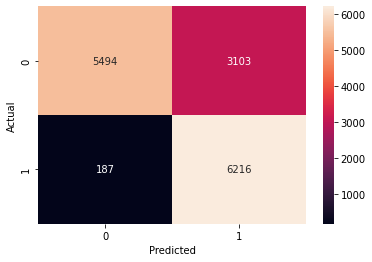

In [ ]:
ann_object.test_report(y_test,predictions)
# [[1551 7046]
#  [ 146 6257]]

In [ ]:
pd.Series(predictions).value_counts()

1    9319
0    5681
dtype: int64